# Chapter 2: Exploratory Data Analysis (EDA)

In this chapter, we will conduct a thorough exploration of the Chronic Kidney Disease dataset. The objective is to identify patterns, spot anomalies, and check assumptions with the help of summary statistics and graphical representations. This understanding will provide crucial insights that can guide our subsequent data preprocessing and modeling strategies.

## 2.1 Data Summary and Descriptive Statistics

In this section, we examine the general characteristics of the data, such as the count, mean, and standard deviation of numerical variables, and the unique categories in categorical variables. We'll also look at the missing values across different columns.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('processed/df.csv')
df_numeric = pd.read_csv('processed/df_numeric.csv')
numerical_columns = [line.strip() for line in open('processed/numerical_columns.txt', 'r')]
categorical_columns = [line.strip() for line in open('processed/categorical_columns.txt', 'r')]

In [4]:
df.describe()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,340.000000,337.000000,306.000000,331.000000,332.000000,263.000000,262.000000,298.000000,279.000000,243.000000,218.000000
mean,51.670588,77.210682,155.810458,60.973414,3.416114,136.633080,4.706489,12.043960,37.311828,8556.378601,4.541284
std,17.017006,14.160858,82.629828,53.074007,6.094231,10.981393,3.469759,2.831862,8.697529,3113.193474,1.032219
min,2.000000,50.000000,22.000000,1.500000,0.500000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,43.000000,70.000000,102.250000,28.000000,1.000000,135.000000,3.900000,10.000000,31.000000,6700.000000,3.800000
50%,55.000000,80.000000,125.000000,44.000000,1.600000,137.000000,4.400000,12.000000,38.000000,8200.000000,4.600000
75%,64.000000,80.000000,175.250000,73.000000,3.212500,141.000000,4.900000,14.200000,44.000000,9800.000000,5.200000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,53.000000,26400.000000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      340 non-null    float64
 1   blood_pressure           337 non-null    float64
 2   specific_gravity         302 non-null    object 
 3   albumin                  303 non-null    object 
 4   sugar                    300 non-null    object 
 5   red_blood_cells          200 non-null    object 
 6   pus_cell                 287 non-null    object 
 7   pus_cell_clumps          345 non-null    object 
 8   bacteria                 345 non-null    object 
 9   blood_glucose_random     306 non-null    float64
 10  blood_urea               331 non-null    float64
 11  serum_creatinine         332 non-null    float64
 12  sodium                   263 non-null    float64
 13  potassium                262 non-null    float64
 14  hemoglobin               2

In [6]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,_1.020,_1,_0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,True,True,False,good,False,False,True
1,7.0,50.0,_1.020,_4,_0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,False,False,False,good,False,False,True
2,62.0,80.0,_1.010,_2,_3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,False,True,False,poor,False,True,True
3,48.0,70.0,_1.005,_4,_0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,True,False,False,poor,True,True,True
4,51.0,80.0,_1.010,_2,_0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,False,False,False,good,False,False,True


In [7]:
df_numeric.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,True
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,True
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,True
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,True
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,True


In [6]:
def print_range_of_values(dataframe):
    for col in dataframe.columns:
        print(col, '\t',dataframe[col].unique())
        
print_range_of_values(df[categorical_columns])

specific_gravity 	 ['_1.020' '_1.010' '_1.005' '_1.015' nan '_1.025']
albumin 	 ['_1' '_4' '_2' '_3' '_0' nan '_5']
sugar 	 ['_0' '_3' '_4' '_1' nan '_2' '_5']
red_blood_cells 	 [nan 'normal' 'abnormal']
pus_cell 	 ['normal' 'abnormal' nan]
pus_cell_clumps 	 ['notpresent' 'present' nan]
bacteria 	 ['notpresent' 'present' nan]
hypertension 	 [True False nan]
diabetes_mellitus 	 [True False nan]
coronary_artery_disease 	 [False True nan]
appetite 	 ['good' 'poor' nan]
pedal_edema 	 [False True nan]
anemia 	 [False True nan]
class 	 [ True False]


In [19]:
import seaborn as sb

## 2.2 Outlier Detection

Outliers can significantly skew the results of our data analysis and statistical modeling process. In this subchapter, we use Z-scores to detect outliers in our dataset and summarize their presence across different columns.

### 2.2.1 Detecting Outliers

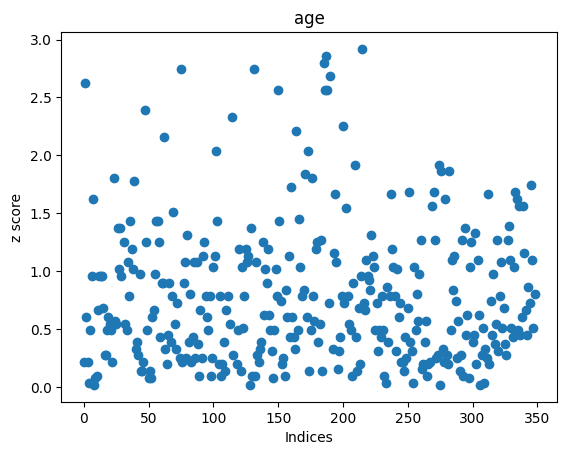

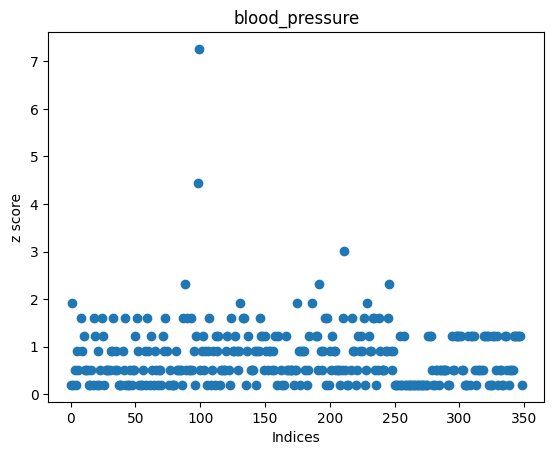

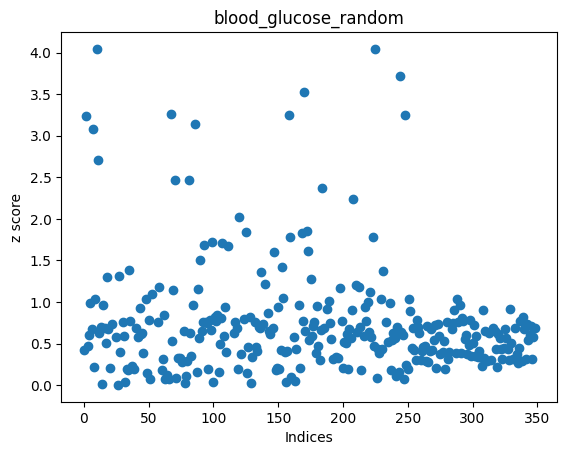

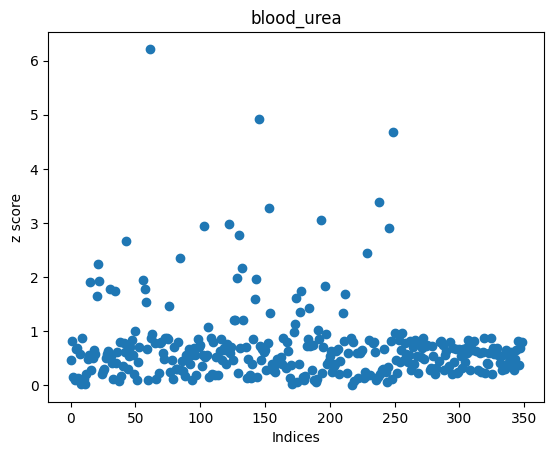

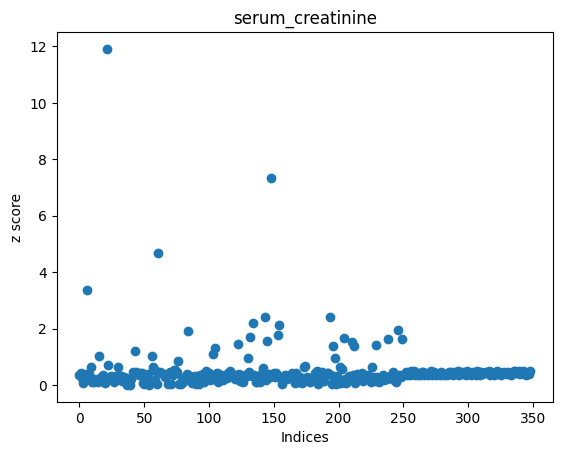

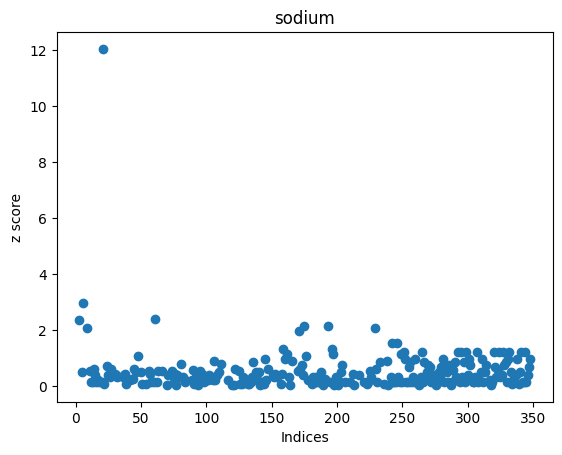

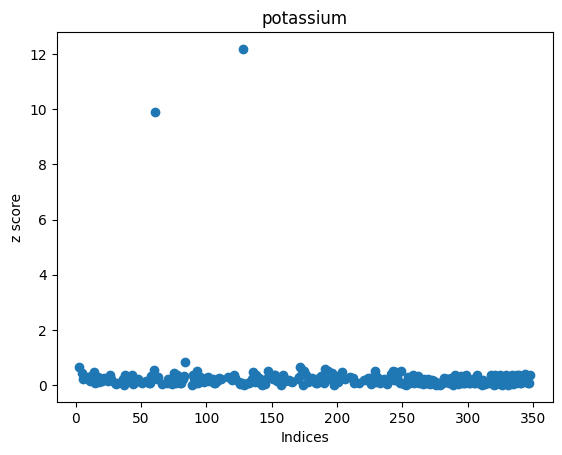

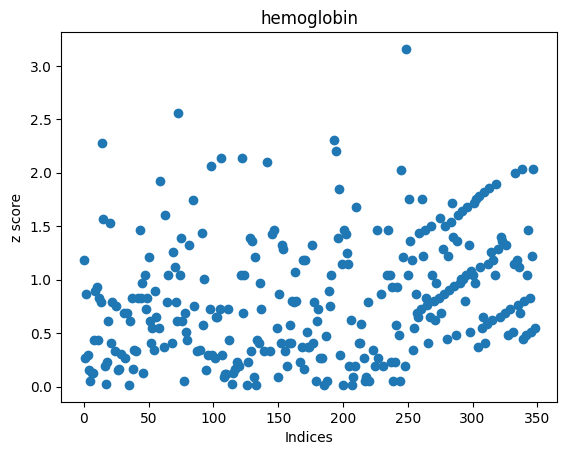

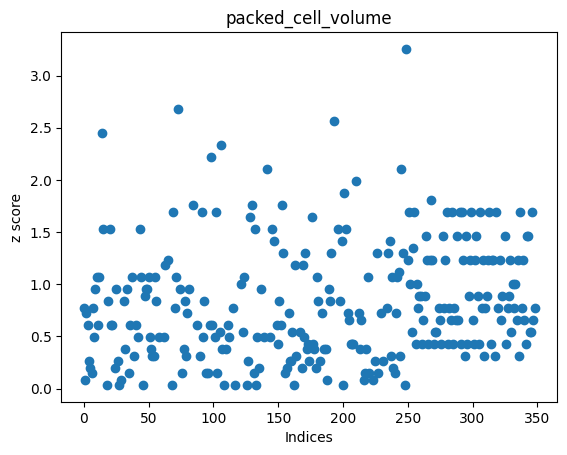

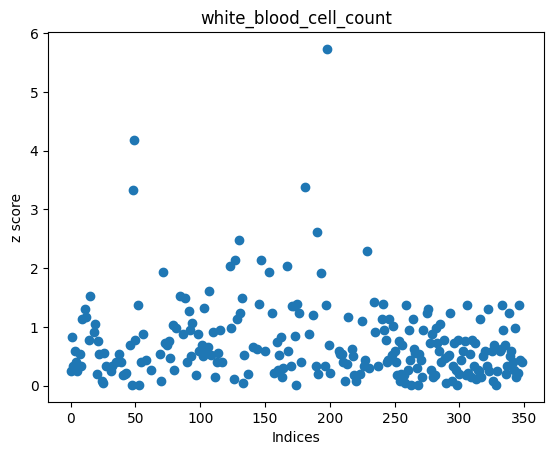

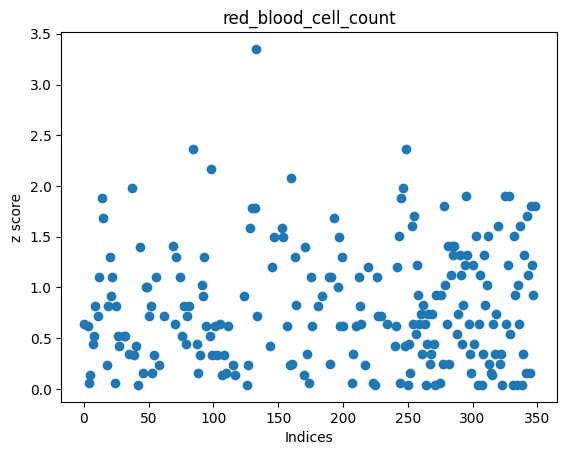

In [20]:
#Detecting outliers in the Data Set using z_score

df_num = df_numeric[numerical_columns]

z_score = np.abs((df_num - df_num.mean())/df_num.std())

for col in z_score.columns:
    x = np.arange(len(z_score[col]))
    plt.figure()
    plt.title(col)
    plt.xlabel('Indices')
    plt.ylabel('z score')
    plt.scatter(x, z_score[col])

### 2.2.2 Summary

In [21]:
outliers = (z_score > 3)

outliers

outlier_indices = {}

for col in outliers.columns:
    outlier_indices[col] = outliers.index[outliers[col]].tolist()

for column, indices in outlier_indices.items():
    print(f'Outliers in column {column}: {df[column][indices].tolist()} at indices: {indices}')


Outliers in column age: [] at indices: []
Outliers in column blood_pressure: [140.0, 180.0, 120.0] at indices: [98, 99, 211]
Outliers in column blood_glucose_random: [423.0, 410.0, 490.0, 425.0, 415.0, 424.0, 447.0, 490.0, 463.0, 424.0] at indices: [2, 7, 10, 67, 86, 158, 170, 225, 244, 248]
Outliers in column blood_urea: [391.0, 322.0, 235.0, 223.0, 241.0, 309.0] at indices: [61, 145, 153, 193, 238, 249]
Outliers in column serum_creatinine: [24.0, 76.0, 32.0, 48.1] at indices: [6, 21, 61, 148]
Outliers in column sodium: [4.5] at indices: [21]
Outliers in column potassium: [39.0, 47.0] at indices: [61, 128]
Outliers in column hemoglobin: [3.1] at indices: [249]
Outliers in column packed_cell_volume: [9.0] at indices: [249]
Outliers in column white_blood_cell_count: [18900.0, 21600.0, 19100.0, 26400.0] at indices: [48, 49, 181, 198]
Outliers in column red_blood_cell_count: [8.0] at indices: [133]


## 2.3 Correlation Analysis

We examine the relationship between different numerical variables in our dataset. We not only focus on their relationship with the target variable (class) but also amongst themselves. We visualize these relationships using correlation heatmaps and box plots.

### 2.3.1 Heatmap

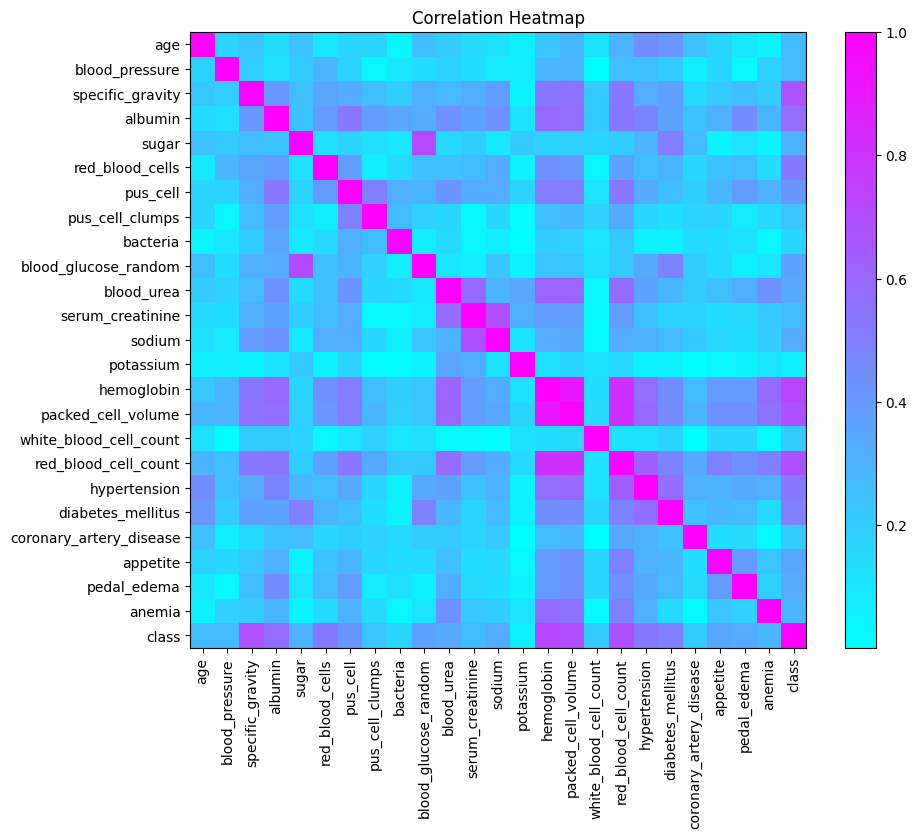

In [24]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr().abs()

# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
plt.imshow(corr_matrix, cmap='cool', interpolation='nearest')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()


In [25]:
# Sort the correlation matrix
sorted_corr_matrix = corr_matrix.sort_values(by='class', ascending=False)

### 2.3.2 Highest correlations with class

The sorted correlation matrix shows the highest correlations with the class. The first 6 columns with the highest correlations with class are visualized again as boxplots here.

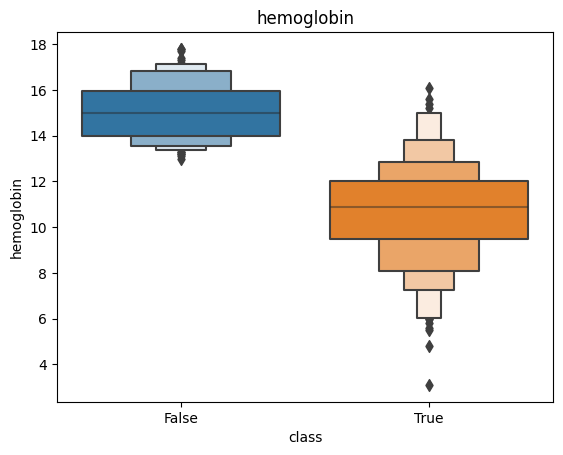

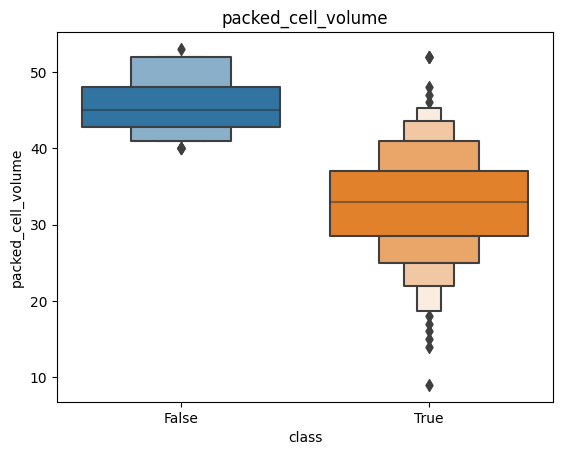

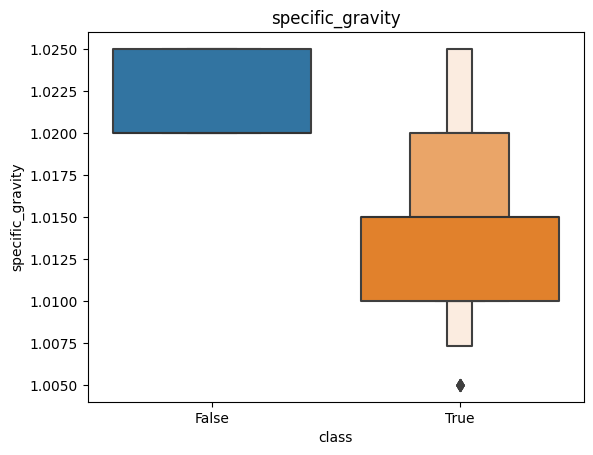

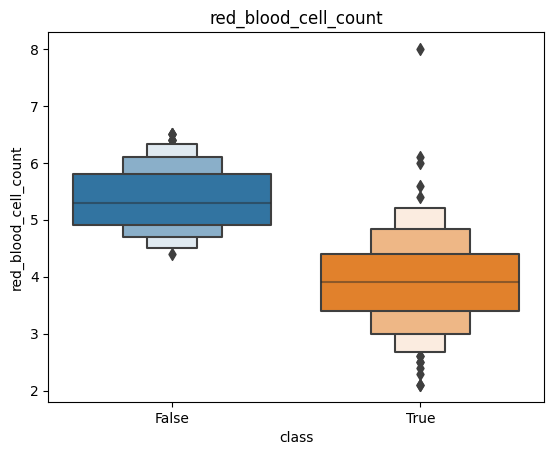

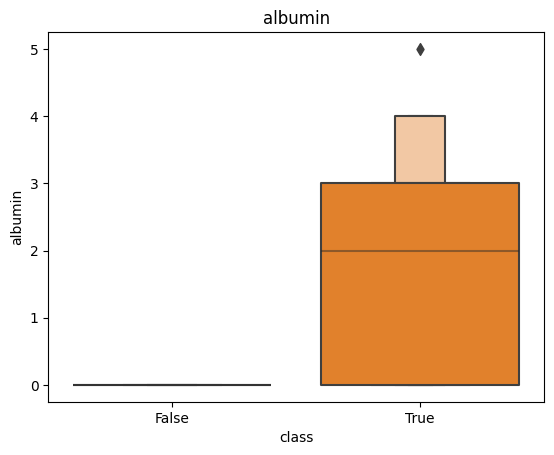

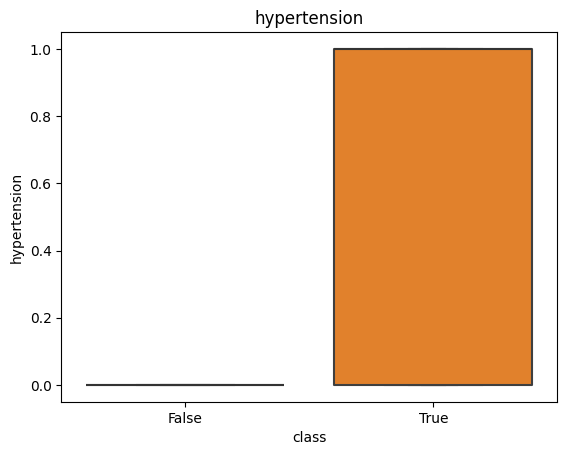

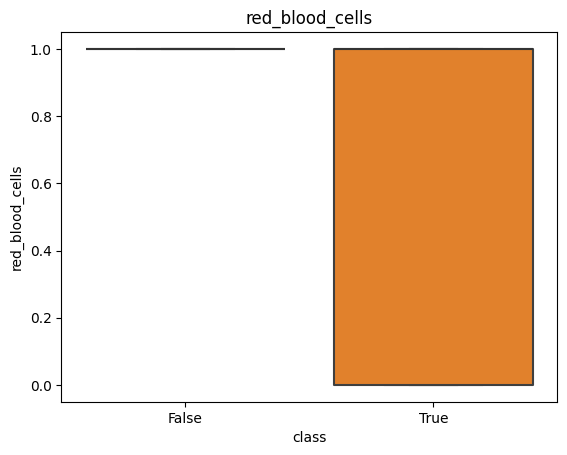

In [26]:
sorted = df_numeric.corr().sort_values(by='class', ascending=False)
for i in range(1,8):
    col = sorted_corr_matrix.index[i]
    if not 'nan' in col: 
        sb.boxenplot(x='class', y=col, data=df_numeric)
        plt.xlabel('class')
        plt.title(col)
        plt.ylabel(col)
        plt.show()

### 2.3.3 Suspected Correlation of Serum Creatinine and Class

Since creatinine is a very crucial indicator for kidney performance, we will visualize here the correlation:

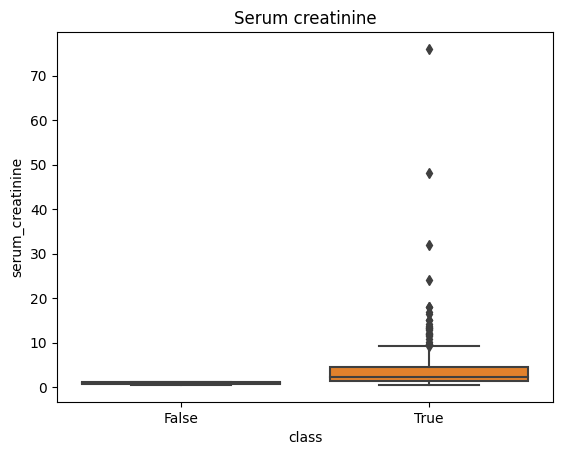

In [27]:
sb.boxplot(x='class', y='serum_creatinine', data=df)
plt.xlabel('class')
plt.ylabel('serum_creatinine')
plt.title('Serum creatinine')
plt.show()

The serum creatinine does not belong to the top correlations with class which were identified above and by the correlation matrix. This suggests that other factors influence the presence or absence of chronic kidney disease more strongly. As diabetes_mellitus is another disease that has effects on the measurements of patients. As diabetes mellitus is very strongly correlated with chronic kidney disease, which is also generally known, we assume that the most correlated variables with the class variable are also the ones strongly correlated with diabetes_mellitus. We need to be careful to jump to conclusions about causation and explaining chronic kidney disease in patients which also have diabetes.

# 2.3 The Effect of Diabetes Mellitus

Given the substantial correlation between diabetes and chronic kidney disease, we explore whether we can derive valuable results from a reduced dataset excluding diabetes patients. We compare the correlation coefficients in this reduced dataset with the original dataset.

In [28]:
for i in range(1,18):
    col = sorted_corr_matrix.index[i]
    if not 'nan' in col: 
        print(col)

hemoglobin
packed_cell_volume
specific_gravity
red_blood_cell_count
albumin
hypertension
red_blood_cells
diabetes_mellitus
pus_cell
blood_glucose_random
appetite
blood_urea
sodium
pedal_edema
sugar
anemia
blood_pressure


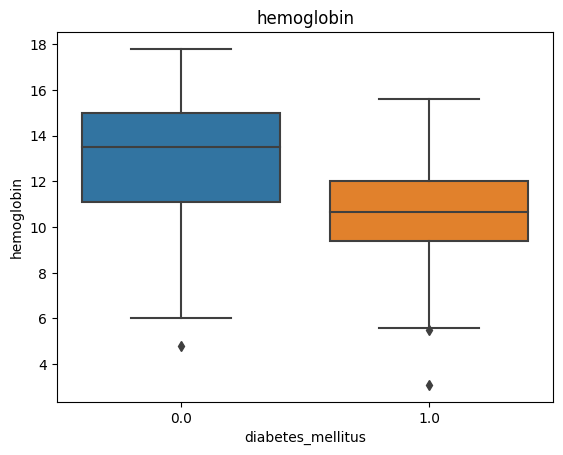

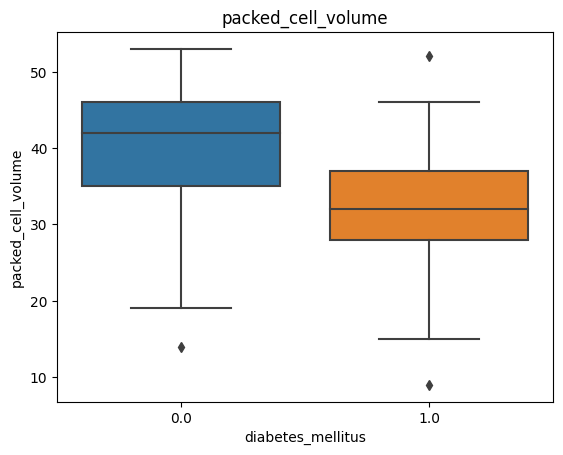

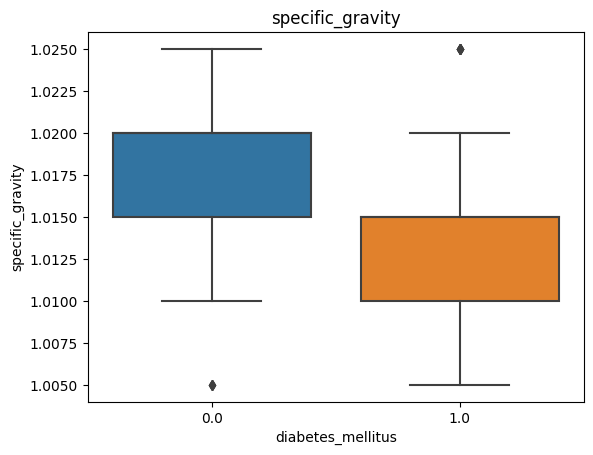

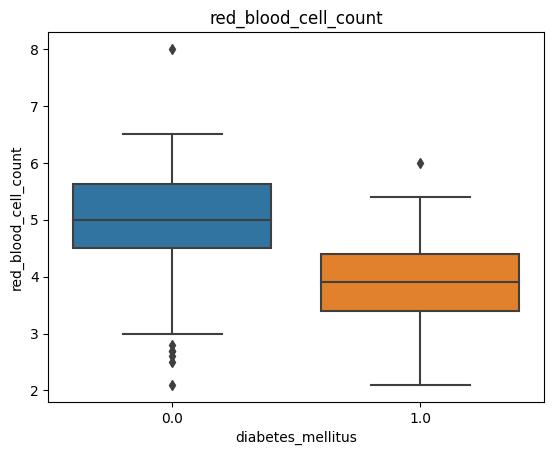

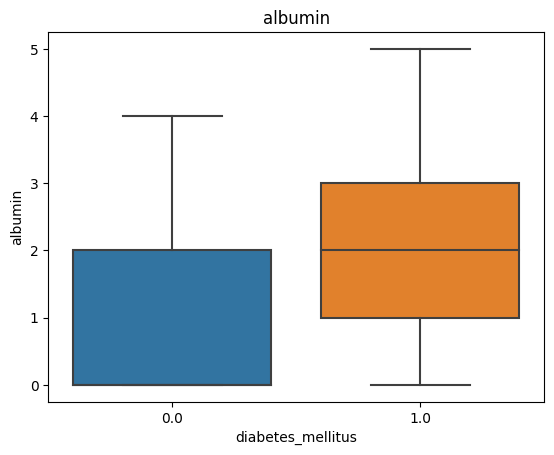

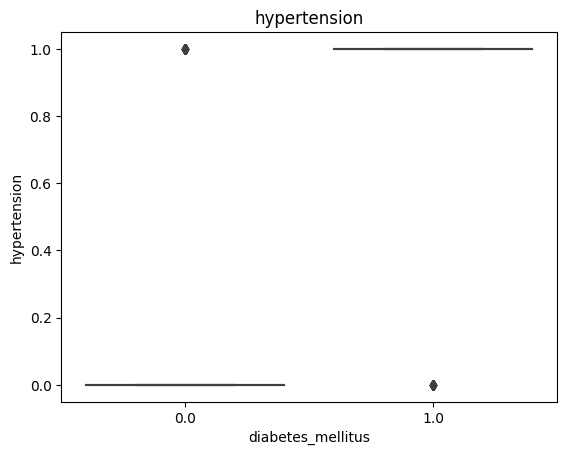

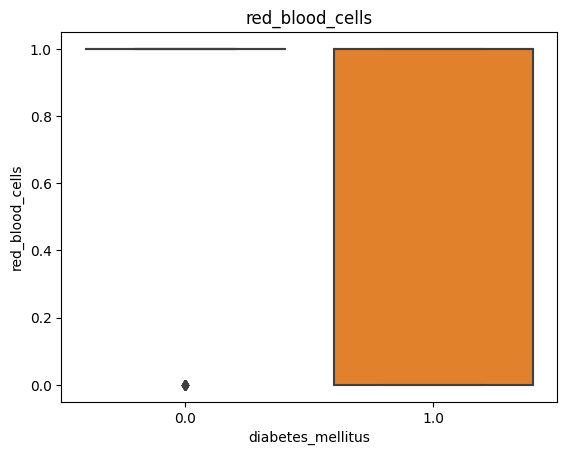

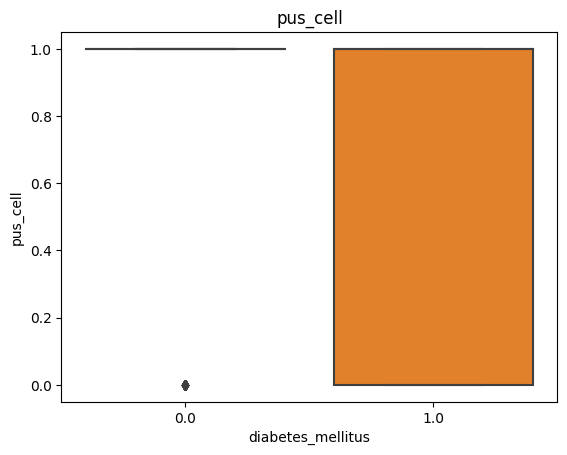

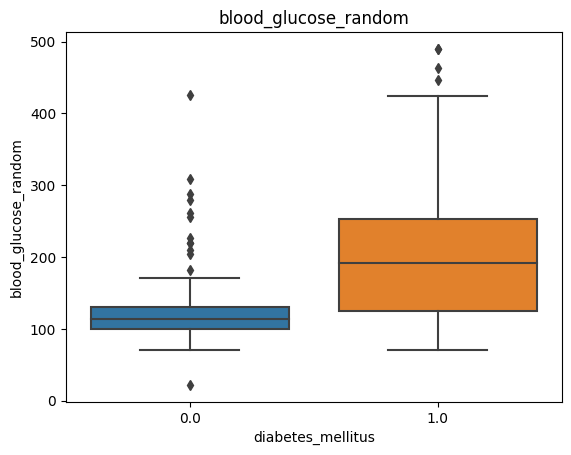

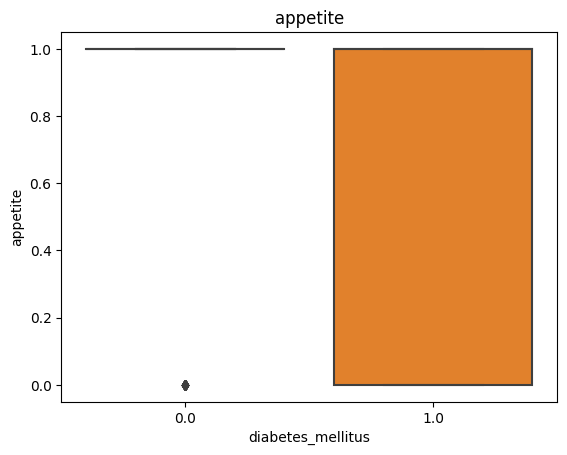

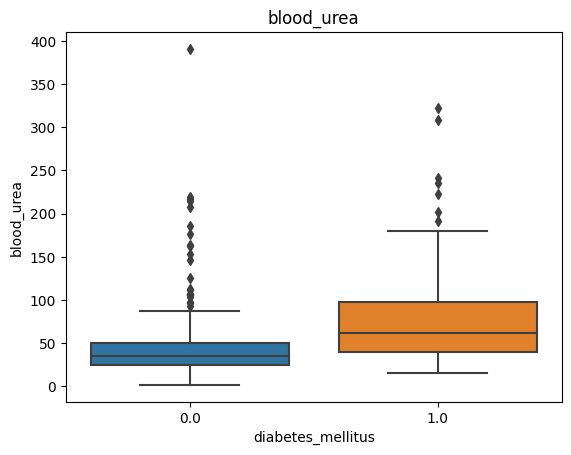

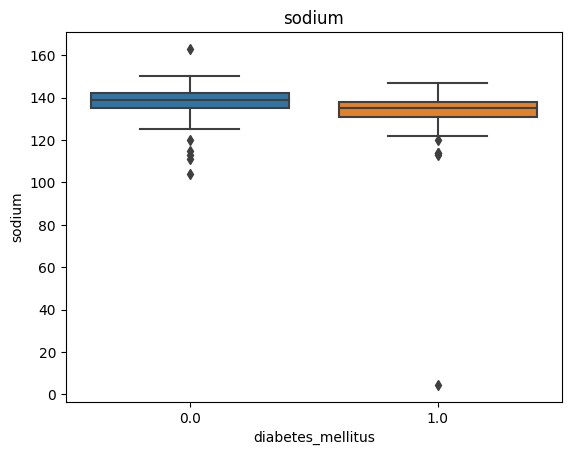

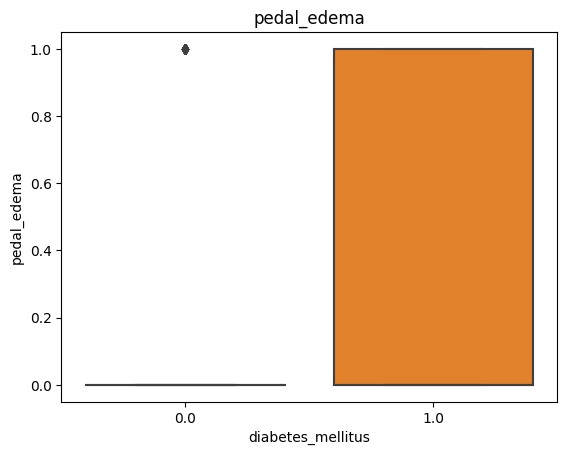

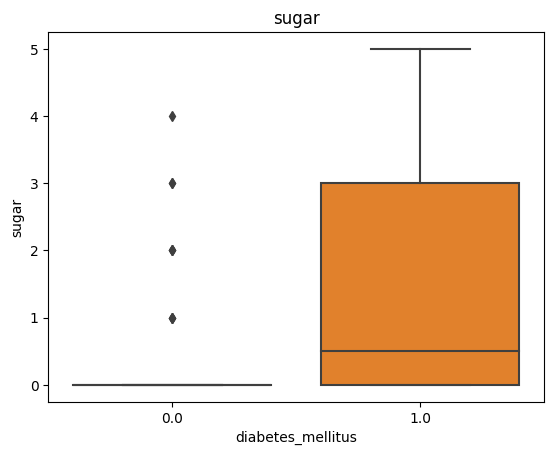

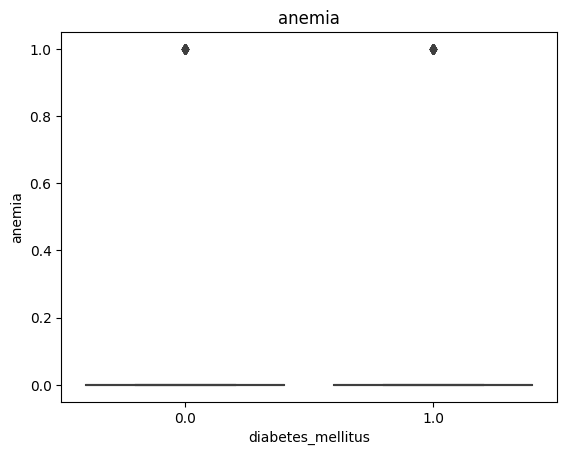

In [29]:

for i in range(1,17):
    col = sorted_corr_matrix.index[i]
    if not 'nan' in col and not 'diabetes_mellitus' in col: 

        sb.boxplot(x='diabetes_mellitus', y=col, data=df_numeric)
        plt.xlabel('diabetes_mellitus')
        plt.ylabel(col)
        plt.title(col)
        plt.show()


## 2.4 Dataset without the diabetes patients

Since there is such a high correlation between diabetes and chronic kidney disease, the disease can hardly be analyzed isolated. We will check whether a reduced dataset without the diabetes patients also provides valuable results.

In [30]:
# remove all columns in which diabetes_mellitus is true
df_without_diabetes = df_numeric[df_numeric['diabetes_mellitus'] == False].copy()
df_without_diabetes = df_without_diabetes.drop(columns=['diabetes_mellitus'])

In [31]:
df_without_diabetes.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,coronary_artery_disease,appetite,pedal_edema,anemia,class
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,11.3,38.0,6000.0,NaN,0.0,0.0,1.0,0.0,0.0,True
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,True
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,4.6,0.0,0.0,1.0,0.0,0.0,True
6,68.0,70.0,1.010,0.0,0.0,NaN,1.0,0.0,0.0,100.0,...,12.4,36.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,True
15,40.0,80.0,1.015,3.0,0.0,NaN,1.0,0.0,0.0,76.0,...,7.6,24.0,3800.0,2.8,1.0,0.0,1.0,0.0,1.0,True


In [32]:
df_without_diabetes.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,coronary_artery_disease,appetite,pedal_edema,anemia
count,205.000000,201.000000,194.000000,194.000000,194.000000,140.000000,189.000000,206.000000,206.000000,179.000000,...,162.000000,178.000000,170.000000,150.000000,132.000000,210.000000,210.000000,209.000000,209.000000,209.000000
mean,46.058537,74.925373,1.017938,0.824742,0.097938,0.842857,0.814815,0.087379,0.053398,122.290503,...,4.549383,13.035393,40.335294,8150.000000,4.935606,0.195238,0.038095,0.861244,0.129187,0.129187
std,17.387072,12.170432,0.005423,1.255127,0.494211,0.365242,0.389479,0.283077,0.225374,44.670510,...,2.820736,2.738909,8.182782,2747.366036,0.995189,0.397331,0.191884,0.346522,0.336212,0.336212
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,2.500000,4.800000,14.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,...,3.800000,11.100000,35.000000,6325.000000,4.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,47.000000,70.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,113.000000,...,4.300000,13.500000,42.000000,7900.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,60.000000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,130.000000,...,4.900000,15.000000,46.000000,9750.000000,5.625000,0.000000,0.000000,1.000000,0.000000,0.000000
max,83.000000,120.000000,1.025000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,425.000000,...,39.000000,17.800000,53.000000,19100.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
without_diab_corr = df_without_diabetes.corr().abs()
compare = pd.DataFrame(without_diab_corr.sort_values('class', ascending=False)['class'])
compare['with_diab_col'] = sorted_corr_matrix['class'].index.drop('diabetes_mellitus')
compare['with_diab_corr'] = sorted_corr_matrix['class'].drop('diabetes_mellitus').to_list()
compare

,class,with_diab_col,with_diab_corr
class,1.000000,class,1.000000
hemoglobin,0.765804,hemoglobin,0.727649
specific_gravity,0.724676,packed_cell_volume,0.695261
packed_cell_volume,0.718518,specific_gravity,0.682417
red_blood_cell_count,0.629911,red_blood_cell_count,0.677326
albumin,0.625672,albumin,0.573803
red_blood_cells,0.588428,hypertension,0.534022
pus_cell,0.459390,red_blood_cells,0.516717
hypertension,0.456347,pus_cell,0.415534
sodium,0.409104,blood_glucose_random,0.356978


In [34]:
# save to csv
df_without_diabetes.to_csv('processed/df_without_diabetes.csv', index=False)

Luckily, the correlations do not change drastically. However, we will still save this dataset and perform our trainings on both.

## 2.5 Correlation Among Other Variables

Apart from the relationship with the target variable, we also explore the correlation among other variables in the dataset. Identifying these relationships can provide additional insights and help in feature engineering.

In [35]:
flattened_corr = df_numeric.corr().unstack().abs().sort_values(ascending=False)

# Remove self-correlations (where both variables are the same)
flattened_corr = flattened_corr[flattened_corr.index.get_level_values(0) != flattened_corr.index.get_level_values(1)]

# Get the top 10 correlation values and their corresponding column names
top_corr = flattened_corr.head(20)
top_col = top_corr.index.tolist()
relevant_correlations = []
# Print the top 10 correlation values and their corresponding column names
for i, corr_value in enumerate(top_corr):
    col1, col2 = top_col[i]
    if((col2, col1) not in relevant_correlations and 'class' not in col1 and 'class' not in col2):
        relevant_correlations.append((col1, col2))
        print("Correlation: {:.3f} - Columns: {}, {}".format(corr_value, col1, col2))

Correlation: 0.910 - Columns: hemoglobin, packed_cell_volume
Correlation: 0.811 - Columns: red_blood_cell_count, packed_cell_volume
Correlation: 0.805 - Columns: hemoglobin, red_blood_cell_count
Correlation: 0.710 - Columns: sugar, blood_glucose_random
Correlation: 0.688 - Columns: sodium, serum_creatinine
Correlation: 0.623 - Columns: red_blood_cell_count, hypertension


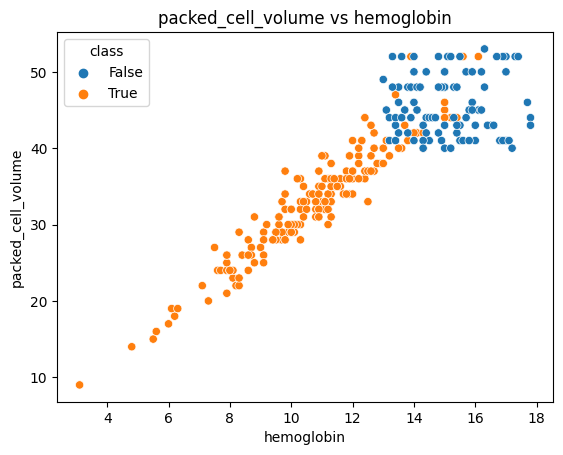

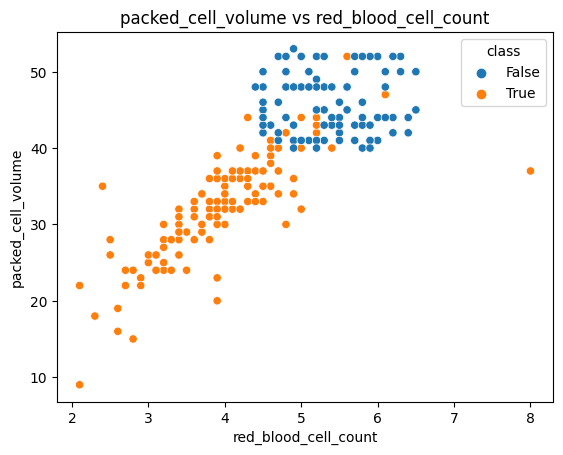

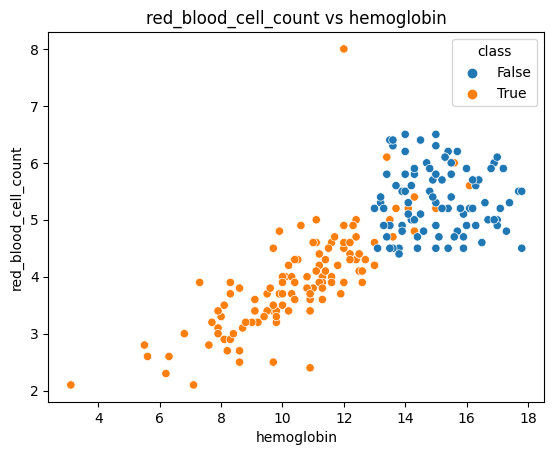

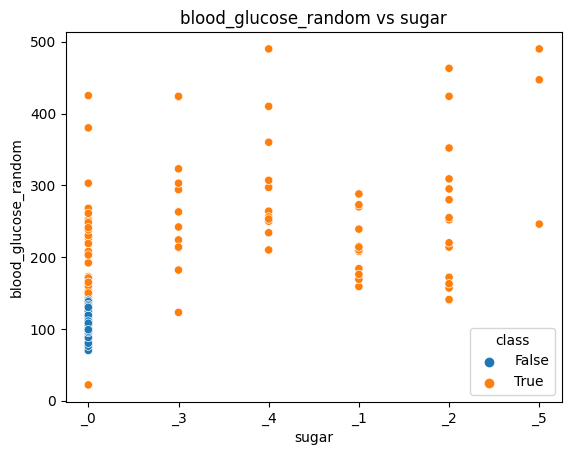

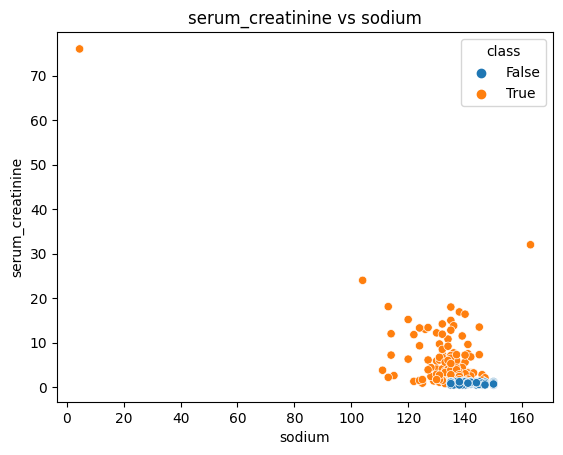

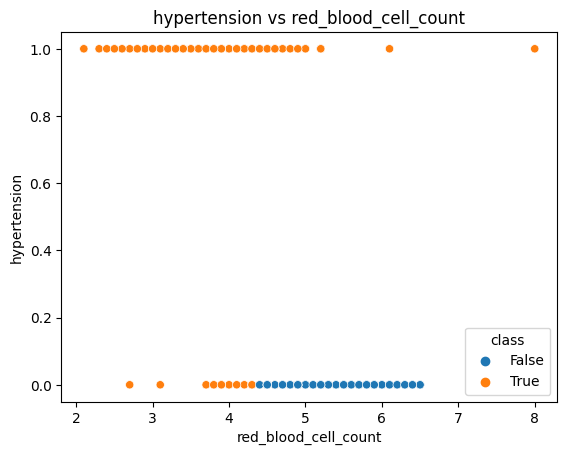

In [36]:
for col1, col2 in relevant_correlations:
    sb.scatterplot(x=col1, y=col2, data=df, hue='class')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col2} vs {col1}')
    plt.show()

## 2.6 Conclusion

Through our exploratory data analysis, we have gained valuable insights into the data. We have identified the presence of outliers, analyzed correlations, and assessed the impact of a significant confounding variable, diabetes mellitus. 

Next, in Chapter 3: "Imputation", we will apply various techniques to handle missing values in our dataset, aiming to prepare a clean and robust dataset for the subsequent modeling phase. These imputation methods will be guided by our EDA findings, as we aim to preserve as much information as possible and avoid introducing additional bias into our dataset.